In [ ]:
# dataset for the project
#----https://drive.google.com/drive/folders/1fVr-DyfxqtmFuvbvniOiL1eS9b3kwgNe?usp=sharing

In [ ]:
# mounting drive to access files in drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# run if zip file uploaded in colab 

from zipfile import ZipFile
file_name = file_path

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
base_model=tf.keras.applications.InceptionV3(input_shape=(224,224,3),weights='imagenet', include_top=False)

In [ ]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
base_model.trainable=False

In [ ]:
x=base_model.get_layer('mixed10').output
x=layers.GlobalMaxPool2D()(x)
x=layers.Flatten()(x)


x=layers.Dense(4096)(x)
x=layers.Dense(4096)(x)


x=layers.Dropout(0.2)(x)


output=layers.Dense(1,activation='sigmoid')(x)

model=Model(base_model.input,output)



In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00000001),metrics=['accuracy'],loss='binary_crossentropy')

callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3,restore_best_weights=True)

checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)



In [ ]:
training=ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation=ImageDataGenerator(rescale = 1./255.)

# Flow training images in batches of 20 using train_datagen generator
train_generator = training.flow_from_directory('/content/gdrive/My Drive/datasets/cnn_emergency_or_not/train',
                                                    batch_size = 8,
                                                    class_mode = 'binary', 
                                                    target_size = (224, 224))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  validation.flow_from_directory( '/content/gdrive/My Drive/datasets/cnn_emergency_or_not/validation',
                                                          batch_size  = 8,
                                                          class_mode  = 'binary', 
                                                          target_size = (224, 224))

Found 1316 images belonging to 2 classes.
Found 330 images belonging to 2 classes.


In [ ]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            epochs = 200,
            callbacks=[model_checkpoint_callback])

Epoch 1/200
165/165 [==============================] - 23s 139ms/step - loss: 1.7654 - accuracy: 0.4514 - val_loss: 1.3070 - val_accuracy: 0.4303
Epoch 2/200
165/165 [==============================] - 22s 134ms/step - loss: 1.3959 - accuracy: 0.4863 - val_loss: 1.0292 - val_accuracy: 0.4697
Epoch 3/200
165/165 [==============================] - 21s 130ms/step - loss: 1.1371 - accuracy: 0.5015 - val_loss: 0.8360 - val_accuracy: 0.5303
Epoch 4/200
165/165 [==============================] - 22s 132ms/step - loss: 1.0121 - accuracy: 0.5304 - val_loss: 0.7324 - val_accuracy: 0.6121
Epoch 5/200
165/165 [==============================] - 22s 131ms/step - loss: 0.9141 - accuracy: 0.5798 - val_loss: 0.6715 - val_accuracy: 0.6636
Epoch 6/200
165/165 [==============================] - 22s 132ms/step - loss: 0.8590 - accuracy: 0.5813 - val_loss: 0.6394 - val_accuracy: 0.6909
Epoch 7/200
165/165 [==============================] - 22s 134ms/step - loss: 0.8270 - accuracy: 0.6064 - val_loss: 0.6200 -

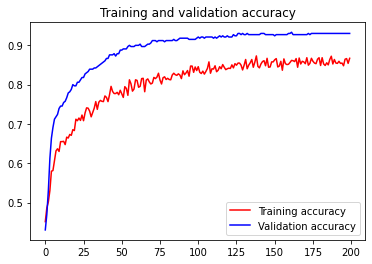

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
model.load_weights(checkpoint_filepath)

In [ ]:
import pandas as pd

In [ ]:
test1=pd.read_csv('/content/gdrive/My Drive/datasets/cnn_emergency_or_not/test.csv')

In [ ]:
predictions=[]
for i in test1['image_names']:
    image = tf.keras.preprocessing.image.load_img('/content/gdrive/My Drive/datasets/cnn_emergency_or_not/test/'+i,target_size=(224,224))
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    input_arr = input_arr/255.
    input_arr = np.expand_dims(input_arr,axis=0)  # Convert single image to a batch.
    predictions.append(input_arr)

In [ ]:
images = np.vstack(predictions)
classes = model.predict(images)
print(classes)

[[6.41275989e-03]
 [3.17206860e-01]
 [4.25419537e-03]
 [9.78683352e-01]
 [8.52936821e-04]
 [8.93865824e-01]
 [3.70801464e-02]
 [9.35613513e-01]
 [1.34129319e-02]
 [3.33954483e-01]
 [3.69626395e-02]
 [1.18497368e-02]
 [7.88458064e-03]
 [3.76471458e-03]
 [6.69554283e-04]
 [9.86939967e-01]
 [6.21376075e-02]
 [9.48977470e-01]
 [6.94559753e-01]
 [9.83869851e-01]
 [9.82119977e-01]
 [1.41366020e-01]
 [7.84973979e-01]
 [7.92064983e-03]
 [3.29455570e-03]
 [2.20565647e-02]
 [9.86080110e-01]
 [1.40837478e-02]
 [2.69880295e-01]
 [1.68766081e-01]
 [9.99144793e-01]
 [8.64369608e-03]
 [9.58686233e-01]
 [2.84999888e-03]
 [1.28043219e-01]
 [1.25965849e-02]
 [5.04100211e-02]
 [5.40313721e-01]
 [7.49290781e-03]
 [4.94043669e-03]
 [9.70573127e-01]
 [7.93037713e-01]
 [2.15989025e-03]
 [5.84265552e-02]
 [4.80265766e-02]
 [9.65702757e-02]
 [1.52907586e-02]
 [4.64055082e-03]
 [5.59331104e-02]
 [7.53573095e-03]
 [9.84324455e-01]
 [4.54502255e-01]
 [2.04046047e-03]
 [2.46080738e-02]
 [9.92929637e-01]
 [4.177551

In [ ]:
train_generator.class_indices

{'0': 0, '1': 1}

In [ ]:
submission=pd.read_csv('/content/gdrive/My Drive/datasets/cnn_emergency_or_not/submission.csv')

In [ ]:
pred=np.array(classes)
pred=pred.reshape((706,))
for i in range(706):
  if pred[i]<0.5:
    pred[i]=0
  else:
    pred[i]=1



submission['emergency_or_not']=pred

submission=submission.set_index('image_names',drop=True)

In [ ]:
sub=submission.to_csv('so2.csv')

In [ ]:
pred[0]

1.0